Offshoot from Nguyen's original file

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
# read the dataset as dataframe 
fileName = 'movies.csv'

df = pd.read_csv('../../_data/_raw/' + fileName)

#Let's have a look at the dataset 
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [104]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [105]:
# IDENTIFY MISSING DATA

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,percent_missing*100))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


<AxesSubplot:>

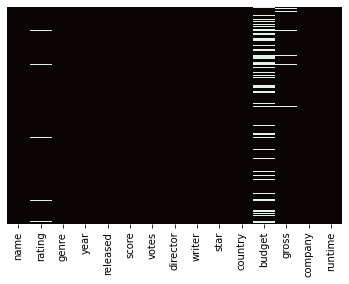

In [84]:
# Check for missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='mako')

# Imput Missing Budget Values



In [85]:
#Since there is a small % of column with missing data, we will drop rows with null values
df = df.dropna(how='any',axis=0) 
df.drop_duplicates() #drop duplicate data as well

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [86]:
#double check and confirm there is NO null value in the data
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,percent_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [87]:
#Data Types for our columns

print(df.dtypes)


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [88]:
#change format of budget and gross columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


In [89]:
# add column for gross profit 
df['gross profit'] = df['gross'] - df['budget']
df.rename(columns = {'gross' : 'gross revenue'}, inplace=True) # rename gross to avoid confusion with gross_profit

In [90]:
# add flexibility to the data in 'released' by spliting into month, day, year

# split released
df[['release month', 'release day', 'release year', 'other']] = df['released'].str.split(' ', n=3, expand=True)

df['release day'] = df['release day'].str.replace(',','') # loose the , in day and make it at int
# some of the values in 'released' are not full dates... drop those
months = ['June', 'July', 'May', 'December', 'October', 'September',
       'February', 'April', 'August', 'March', 'November', 'January']
df = df[df['release month'].isin(months)]
df = df[df['release day'].astype(int) <= 31]
df['release day'] = df['release day'].astype(int)
df['release year'] = df['release year'].astype(int)


In [91]:
# rebuild a valid 'release date' column
from time import strptime
df['release month num'] = [strptime(str(x), '%B').tm_mon for x in df['release month']]
df['release date'] = pd.to_datetime(df['release month num'].astype(str) +'-'+ df['release day'].astype(str) +'-'+ df['release year'].astype(str))

# add a 'release quater' column
df['release quarter'] = (df['release month num'].astype(int)-1)//3 + 1

# add 'release day of week' column
df['release day of week'] = df['release date'].dt.day_name()

# show that all release date related attributes are valid
print(df['release month'].unique())
print(df['release day of week'].unique())
print(df['release day'].unique())
print(df['release year'].unique())
print(df['release month num'].unique())
print(df['release quarter'].unique())

# show that quarter values are correctly mapped to months
print(df.groupby(['release month num', 'release month','release quarter']).size().reset_index().rename(columns={0:'count'}))

df.drop(columns=['other', 'released', 'year'], inplace=True) #drop columns we don't need anymore

print(df.columns)

df.to_csv('../../_data/_processed/' + 'processed_for_viz.csv', index=False)

['June' 'July' 'May' 'December' 'October' 'September' 'February' 'April'
 'August' 'March' 'November' 'January']
['Friday' 'Wednesday' 'Tuesday' 'Thursday' 'Saturday' 'Sunday' 'Monday']
[13  2 20 25  9 19 16 17 26 12  3  8 15 24  1 10 30 27 11 28 21  6 18 31
 14 22  4  5 23 29  7]
[1980 1981 1984 1983 1982 1987 1985 1986 1990 1988 1992 1989 1991 1999
 1994 1993 1995 2001 1996 2000 1997 1998 2002 2003 2004 2014 2005 2006
 2007 2008 2010 2009 2013 2011 2016 2015 2012 2017 2018 2019 2020]
[ 6  7  5 12 10  9  2  4  8  3 11  1]
[2 3 4 1]
    release month num release month  release quarter  count
0                   1       January                1    443
1                   2      February                1    418
2                   3         March                1    448
3                   4         April                2    422
4                   5           May                2    387
5                   6          June                2    427
6                   7          July      